# INFORMATION RETRIEVAL AND KNOWLEDGE DISCOVERY

    Victorine Wakam 
    
### PROJECT1 : YEAR SONG PREDICTION 

#### TASK: 
    
    Prediction of the release year of a song from audio features. Songs are mostly western, commercial tracks ranging from 1922 to 2011, with a peak in the year 2000s.
 
#### Attribute Information:

    90 attributes, 12 = timbre average, 78 = timbre covariance
    The first value is the year (target), ranging from 1922 to 2011.
    Features extracted from the 'timbre' features from The Echo Nest API.
    We take the average and covariance over all 'segments', each segment
    being described by a 12-dimensional timbre vector.
 
#### Data Set Information:

    You should respect the following train / test split:
    train: first 463,715 examples
    test: last 51,630 examples
    It avoids the 'producer effect' by making sure no song
    from a given artist ends up in both the train and test set.




In [7]:
# librairies


import pandas as pd
#from pandas.tools.plotting import scatter_matrix
import numpy as np
# fixed random seed for reproducibility
np.random.seed(0)


import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,7
rcParams['axes.grid'] = True
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, average_precision_score


In [8]:
# linear regression feature importance
#from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


In [9]:
features = ['year', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 't31', 't32', 't33', 't34', 't35', 't36', 't37', 't38', 't39', 't40', 't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 't51', 't52', 't53' , 't54', 't55', 't56', 't57', 't58', 't59', 't60', 't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70', 't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80', 't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90']

# Note that our classes (which we have to predict from those 90 features), are all
# the years from 1922 to 2011: 1922, 1923, 1924, 1925, ..., 2011
# Theare exactly 90 years, so we also have 90 classes:
nb_classes = 90

In [10]:
# reading the data
filename = "YearPredictionMSD.txt"
data = pd.read_csv(filename, header = None, names = features)
X = np.array(data.drop(['year'], axis=1))
y = np.array(data['year'])

In [14]:
print(data.shape)
data.iloc[100:110, 0:10]

(515345, 91)


,year,t1,t2,t3,t4,t5,t6,t7,t8,t9
100,2008,36.57341,40.76354,-1.37479,18.26958,-7.85506,-12.91930,15.95326,13.05346,-10.98357
101,2009,47.57913,44.00216,-20.86854,15.68389,0.28155,-12.98692,8.40916,8.45960,-15.20321
102,2009,50.01514,85.99753,-10.86962,-16.04817,-5.21407,-19.06423,0.60184,4.70044,-3.45756
103,2009,47.46427,38.57579,-16.62851,-8.74569,-17.57472,-20.53645,8.71748,-2.62025,0.75556
104,2008,42.40756,30.87384,-53.31370,75.21764,13.45603,10.56135,4.32810,20.33905,2.81100
105,2008,42.93189,17.33496,-14.89457,30.36314,-30.71208,-14.58057,-0.86303,-6.77871,7.45277
106,2008,47.25722,76.94691,33.35870,22.21808,24.60699,-13.97433,-1.26071,4.90241,-7.64389
107,2008,51.47089,24.49163,10.80634,-5.68605,-2.73621,-23.88744,-3.49063,-1.26504,5.07964
108,2008,45.90578,74.56383,-3.78965,12.39632,23.83092,-26.01724,5.72196,-3.25670,5.24608
109,2008,50.54486,44.66363,21.59233,0.63973,18.81458,-31.82536,11.59790,8.54721,-6.26381


#### Part I: DATASET ANALYSIS & UNDERSTANDING
We will try to vizualize the data, the different features and try to see if they are all relavant and if we should use all of them. 

A. Data Characteristics
- data visualization 
- training set
- label distribution ...



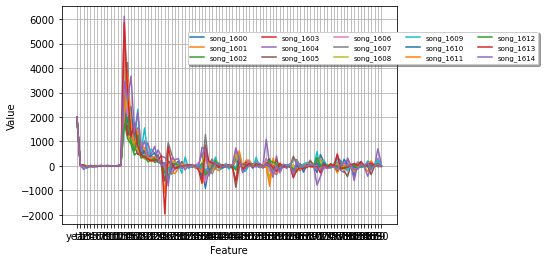

In [7]:
# Let's plot 15 samples of X (from item 1600 to item 1615)
for i in range(1600, 1615):
    plt.plot(data[1:].loc[i], label='song_' + str(i))
    
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 0.9), ncol=5, fancybox=True, shadow=True, fontsize=7)

Text(0.5, 1.0, 'feature 4 to 19 distribution')

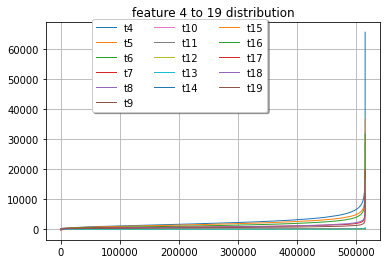

In [8]:
# for 10 features, let's see the range of the distribution of their values
# we will take features 4th to 20th as features :12 = timbre average, 78 = timbre covariance
for t in features[4:20]:
    values = data[t].to_numpy() #.as_matrix()
    #print(values)
    plt.plot(sorted(values), label=t, linewidth=1)

plt.legend(loc='upper center', bbox_to_anchor=(0.4, 1.04), ncol=3, fancybox=True, shadow=True)
plt.title("feature 4 to 19 distribution")

we can see that there are some features that have really high values and might be dominant when we train the model; this is why we need to scale the values

Let's see the data distribution per yer; number of songs per year in the dataset

In [9]:
#data.head()

In [10]:
# create a dictionary to store the years and counts
num_songs={}
years = range(1922,2012)
for element in years:
    num_songs[element] = len(data[data.year==element])

#num_songs



Text(0, 0.5, 'Number of songs')

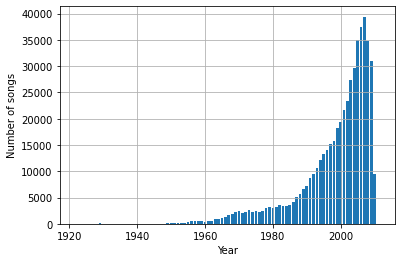

In [11]:
# histogram of the data distribution

values = [num_songs[element] for element in years]
plt.bar(years , values , align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")



We can see that the number of songs is increasing exponentially over the years and there is a pic in the 2020s 

#### Part III: Data Cleaning/Preprocessing
null values
missing values

##### Normalization

Let's normalize the features and shift the year values starting from 0 (recommended in learning problems)

In [11]:
# data normalizations (scaling down all values to the interval [0,1])
# The years 1922-2011 are scaled down to integers [0,1,2,..., 89] 
a = X.min()
b = X.max()
X = (X - a) / (b - a)  # all values now between 0 and 1 !
y = y - y.min()        # The years 1922-2011 are mapped to 0-89

In [12]:
# creating a new data frame of normalized data
data_nrm = pd.DataFrame(X, columns=features[1:] )
data_nrm["year"]=y

data_nrm.head()


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t82,t83,t84,t85,t86,t87,t88,t89,t90,year
0,0.185014,0.184660,0.185301,0.184503,0.184178,0.184232,0.184084,0.184242,0.184491,0.184363,...,0.183719,0.185126,0.184585,0.184408,0.184108,0.185243,0.184371,0.184053,0.184422,79
1,0.184999,0.184623,0.185267,0.184555,0.184266,0.184086,0.184503,0.184383,0.184627,0.184451,...,0.184150,0.184804,0.184926,0.184271,0.183994,0.185269,0.184544,0.185119,0.184728,79
2,0.185026,0.184789,0.185087,0.184561,0.184312,0.184164,0.184353,0.184365,0.184593,0.184411,...,0.184717,0.183762,0.184530,0.184393,0.184930,0.182967,0.184393,0.184886,0.184386,79
3,0.184993,0.184371,0.184844,0.184426,0.184406,0.184069,0.184457,0.184266,0.184438,0.184315,...,0.182264,0.184184,0.183815,0.184239,0.185419,0.183500,0.184517,0.186871,0.184628,79
4,0.185026,0.184918,0.185227,0.184499,0.184197,0.184185,0.184239,0.184278,0.184551,0.184406,...,0.183700,0.185200,0.184174,0.184376,0.184301,0.185036,0.184492,0.185085,0.184751,79


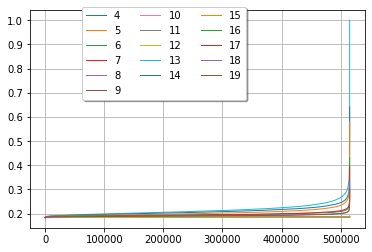

In [14]:
# let's look at the features again beween 4 and 20
for t in range(4,20):
    values = X[:,t] #.as_matrix()
    #print(values)
    plt.plot(sorted(values), label=t, linewidth=1)

plt.legend(loc='upper center', bbox_to_anchor=(0.4, 1.04), ncol=3, fancybox=True, shadow=True)

# values are indeed between 0 and 1

Text(0.5, 1.0, 'song 1600 to 1614 distribution')

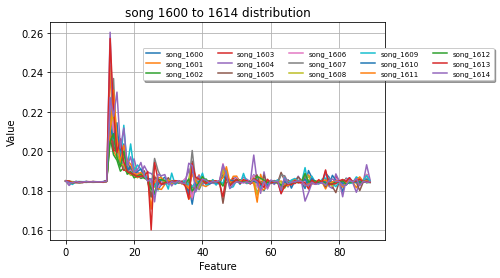

In [15]:

# Let's plot 15 samples of X (from item 1600 to item 1615)
for i in range(1600, 1615):
    plt.plot(X[i], label='song_' + str(i))
    
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 0.9), ncol=5, fancybox=True, shadow=True, fontsize=7)
plt.title("song 1600 to 1614 distribution")

Text(0.5, 1.0, 'release year for each instance')

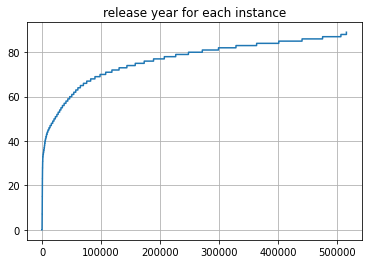

In [8]:
# the year values:
plt.plot(sorted(y))
plt.title("release year for each instance")
# WE CAN see that it goes from 0 to 89

##### Analyzing of the missing values and null values

In [17]:
# let's see for the different columns/features if they have missing values
data.isnull().sum().sum()


0

In [18]:
# our dataset does not have any NULL or missing  value 
data.isna().sum().sum()

0

In [19]:
# values equal to zero
(data==0).sum().sum()
# we only have 4 values equal to zero, we consider it small given the 515k*90 elements in our dataframe

4

##### find duplicate column values and remove them if they are


In [20]:
data_nw = data.T.drop_duplicates().T
data_nw.columns


Index(['year', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10',
       't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20',
       't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30',
       't31', 't32', 't33', 't34', 't35', 't36', 't37', 't38', 't39', 't40',
       't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50',
       't51', 't52', 't53', 't54', 't55', 't56', 't57', 't58', 't59', 't60',
       't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70',
       't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80',
       't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90'],
      dtype='object')

In [21]:
# we can see that we still have the 90 features, so no feature is a duplicate of another

##### Variation of each feature
we will see the variation (variance or standard deviation) of the features before and after normalization

In [22]:
# let's compute the variance in the data of each feature in the dataset:
#data.var()

In [23]:
#data.describe()

In [24]:
std_dt = pd.DataFrame(X).describe()
#std_dt

Text(0.5, 1.0, 'standard deviation for each feature')

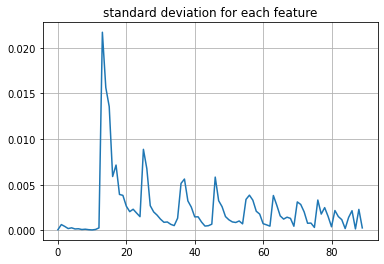

In [25]:
plt.plot(std_dt.loc['std'])
plt.title("standard deviation for each feature")

In [27]:
a= pd.DataFrame(std_dt.loc['std'] ) #, columns="std")
a["feat"] = range(1,91)
b = a.sort_values('std', ascending=False )
#a

In [29]:
b.head()

,std,feat
13,0.021705,14
14,0.015652,15
15,0.013559,16
25,0.008881,26
17,0.007157,18


In [85]:
# there are some features that present a lot of variance, but as the features represent timbre average and
# timbre covariance, they might be useful to our problem and help in different ways


In [ ]:
# after normalization, it looks like the variance in the different features stays the same and is just rescaled
# may be to delete

#### Part II: Feature Analysis & Selection
which features to select and why?

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


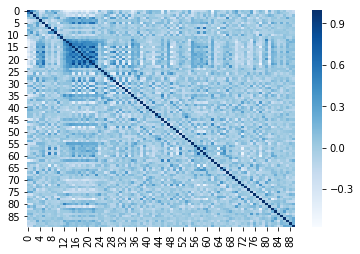

In [30]:
import seaborn as sns
# let's see if there are correlation between the features and some more relevant than others

feat_corr = pd.DataFrame(X).corr()
ax1 = sns.heatmap(feat_corr, cmap='Blues')
plt.show()


We can see that there might be a strong correlation between the features around feature 12 and feature 24;
let's try to determine relevant factors 

Let's compute the importance of each factor to the independent variable, year


    feature         score
0       1.0  70556.490249
12     13.0   3789.207540
84     85.0   2106.547023
9      10.0   2020.508501
75     76.0   1225.970393
..      ...           ...
1       2.0  -4539.823347
8       9.0  -5679.936290
7       8.0  -8132.090486
10     11.0 -13355.293591
5       6.0 -17737.225401

[90 rows x 2 columns]


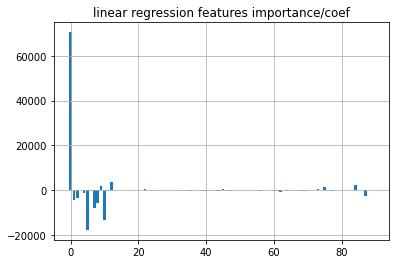

In [51]:
# let's use the linear reg model to compute the scores
model = LinearRegression()

# fitting the model into the dataset
model.fit(X,y)

# get the features'importance/coefficients
importance = model.coef_

scores_df = pd.DataFrame(columns=["feature","score"])

# summarize feature importance
for i,v in enumerate(importance):
    scores_df.loc[len(scores_df)] = [i+1,v]
    #print('Feature: %0d, Score: %.5f' % (i,v))
    
scores_df = scores_df.sort_values('score', ascending=False )
print (scores_df)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("linear regression features importance/coef")
plt.show()


In [52]:
scores_df.tail(10)

,feature,score
6,7.0,-543.161762
62,63.0,-626.124374
4,5.0,-1188.560874
87,88.0,-2514.405118
2,3.0,-3518.004452
1,2.0,-4539.823347
8,9.0,-5679.936290
7,8.0,-8132.090486
10,11.0,-13355.293591
5,6.0,-17737.225401


It says in the documentation, the i-th feature importance is calculated as the difference between loss(model with i-th feature excluded) - loss(model).

So a negative feature importance value means that feature makes my loss go up?

***

Negative feature importance value means that feature makes the loss go up. This means that your model is not getting good use of this feature. This might mean that your model is underfit (not enough iteration and it has not used the feature enough) or that the feature is not good and you can try removing it to improve final quality.


In [41]:
# another method:
# calculate simple coefficient statistics between each feature and the target variable.
# Statistics for Filter Feature Selection Methods
# Numerical Input, Numerical Output

# the most popular methods are to use correlation coefficient, such as Pearson’s for a linear correlation, 
# or rank-based methods for a nonlinear correlation (Spearman’s rank coefficient). 


(515345,)

In [53]:
# let's try the pearson method; performed using Pearson’s Correlation Coefficient via the f_regression() function in sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# generate dataset
#X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=65)
# apply feature selection
X_selected = fs.fit_transform(X, y)
#print(X_selected.shape)


In [151]:
# fs.scores_


In [54]:
filter = fs.get_support()
feature = np.array(features[1:])
#print(filter)

#print("All features:")
#print(feature)
 
#print("Selected best 65:")
#print(feature[filter])
#print(X_selected) 

In [49]:
# maximal penalty yielding nonzero coefficients for the lasso
np.abs(X.T.dot(y)).max() / (X.shape[0]*X.shape[1])

0.18242300449707174

    feature     score
0       1.0  0.786421
12     13.0  0.039590
84     85.0  0.023022
75     76.0  0.011336
22     23.0  0.007185
..      ...       ...
7       8.0 -0.030794
8       9.0 -0.034224
2       3.0 -0.043258
1       2.0 -0.047651
5       6.0 -0.186056

[90 rows x 2 columns]


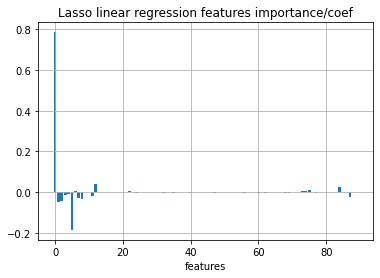

In [74]:
# fitting lasso and seeing the coef
from sklearn.linear_model import Lasso

# let's use the Lasso reg model to compute the scores; alpha=0 ==simple linear reg
model2 = Lasso(alpha=1)

# fitting the model into the dataset
model2.fit(X,y)

# get the features'importance/coefficients
importance = model2.coef_

scores_df = pd.DataFrame(columns=["feature","score"])

# summarize feature importance
for i,v in enumerate(importance):
    scores_df.loc[len(scores_df)] = [i+1,v]
    #print('Feature: %0d, Score: %.5f' % (i,v))
    
scores_df = scores_df.sort_values('score', ascending=False )
print (scores_df)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("features")
plt.title("Lasso linear regression features importance/coef")
plt.show()


In [65]:
empty_dataframe = pd. DataFrame()
list_dataframe = pd. DataFrame([1, 2, 3])
result_dataframe = empty_dataframe. append(list_dataframe)
print(result_dataframe)

   0
0  1
1  2
2  3


In [75]:
scores_df.tail(10)

,feature,score
62,63.0,-0.006520
4,5.0,-0.009582
3,4.0,-0.012048
11,12.0,-0.019379
87,88.0,-0.022459
7,8.0,-0.030794
8,9.0,-0.034224
2,3.0,-0.043258
1,2.0,-0.047651
5,6.0,-0.186056


In [34]:
# Pearson correlation

In [35]:
corr_p   = data_nrm.corr(method="pearson")
#corr_p

Text(0.5, 1.0, 'Features pearson correlation to target value')

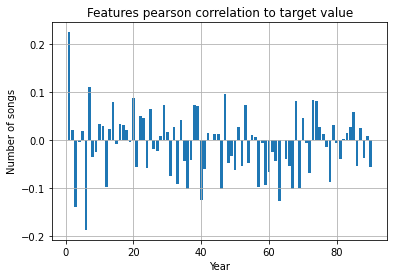

In [36]:
b = corr_p.loc["year"][:90]
# plt.plot(b)

feat = range(1,91)
plt.bar(feat , np.array(b) , align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")
plt.title("Features pearson correlation to target value")


In [41]:
b.sort_values().head(10)

t6    -0.187443
t3    -0.139541
t63   -0.126348
t40   -0.123974
t67   -0.102841
t46   -0.101324
t36   -0.101007
t69   -0.099484
t12   -0.097164
t57   -0.096973
Name: year, dtype: float64

In [ ]:
#spearman correlation

In [42]:
corrrelation_p    = data_nrm.corr(method="spearman");

In [43]:
#corrrelation_p

Text(0.5, 1.0, 'Features spearman correlation to target value')

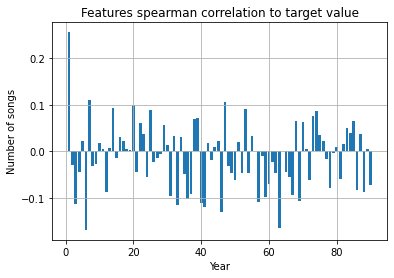

In [44]:
b = corrrelation_p.loc["year"][:90]
# plt.plot(b)

feat = range(1,91)
plt.bar(feat , np.array(b) , align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")
plt.title("Features spearman correlation to target value")

In [45]:
b.sort_values().head(10)

t6    -0.168484
t63   -0.163859
t46   -0.130360
t41   -0.119465
t33   -0.114609
t3    -0.112734
t40   -0.110417
t57   -0.108535
t69   -0.107472
t36   -0.101749
Name: year, dtype: float64

#### Part IV: DATA TRANSFORMATION & MODELS USED
Feature Scaling

In this part, given that we already scaled the features (for values between 0 and 1), we are only going to talk about the models we will use for our regression problem

we plan on using the lasso linear regression and the polynomial ridge regression for different selection of features and compare the results 

we talked more about the different models in the report

before training the models, let's palliate to the imbalance in the dataset

we will use the Borderline-SMOTE SVM technique 
Another variation of Borderline-SMOTE is Borderline-SMOTE SVM, or we could just call it SVM-SMOTE.
The main differences between SVM-SMOTE and the other SMOTE are that instead of using K-nearest neighbors to identify the misclassification in the Borderline-SMOTE, the technique would incorporate the SVM algorithm

In [38]:
#data_nrm.iloc[:,:-1]

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90
0,0.185014,0.184660,0.185301,0.184503,0.184178,0.184232,0.184084,0.184242,0.184491,0.184363,...,0.184556,0.183719,0.185126,0.184585,0.184408,0.184108,0.185243,0.184371,0.184053,0.184422
1,0.184999,0.184623,0.185267,0.184555,0.184266,0.184086,0.184503,0.184383,0.184627,0.184451,...,0.184464,0.184150,0.184804,0.184926,0.184271,0.183994,0.185269,0.184544,0.185119,0.184728
2,0.185026,0.184789,0.185087,0.184561,0.184312,0.184164,0.184353,0.184365,0.184593,0.184411,...,0.184432,0.184717,0.183762,0.184530,0.184393,0.184930,0.182967,0.184393,0.184886,0.184386
3,0.184993,0.184371,0.184844,0.184426,0.184406,0.184069,0.184457,0.184266,0.184438,0.184315,...,0.184823,0.182264,0.184184,0.183815,0.184239,0.185419,0.183500,0.184517,0.186871,0.184628
4,0.185026,0.184918,0.185227,0.184499,0.184197,0.184185,0.184239,0.184278,0.184551,0.184406,...,0.184517,0.183700,0.185200,0.184174,0.184376,0.184301,0.185036,0.184492,0.185085,0.184751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,0.185030,0.184963,0.184669,0.184325,0.184349,0.184191,0.184420,0.184458,0.184286,0.184427,...,0.184454,0.184347,0.184010,0.184721,0.184332,0.184665,0.182629,0.184437,0.183884,0.184202
515341,0.185013,0.184865,0.184626,0.184349,0.184050,0.184164,0.184490,0.184438,0.184363,0.184421,...,0.184796,0.183988,0.183637,0.185097,0.184584,0.185584,0.184262,0.184555,0.185537,0.184529
515342,0.184954,0.184551,0.183914,0.184503,0.184031,0.184366,0.184166,0.184118,0.184338,0.184252,...,0.184162,0.183511,0.182856,0.185899,0.184529,0.184824,0.181309,0.184319,0.185064,0.184294
515343,0.184942,0.184796,0.184352,0.184363,0.184151,0.184162,0.184503,0.184444,0.184245,0.184385,...,0.185227,0.187903,0.184337,0.186181,0.184662,0.184025,0.185281,0.184646,0.184578,0.184887


In [22]:
# before the smote, PCA representation
from sklearn.decomposition import PCA
pca_song = PCA(n_components=2)
principalComponents_song = pca_song.fit_transform(data_nrm.iloc[:,:-1])

#df holding the 2 PCA
principal_song_Df = pd.DataFrame(data = principalComponents_song, columns = ['PC1', 'PC2'])

# explained variation of each PC
print('Explained variation per PC: {}'.format(pca_song.explained_variance_ratio_))



Explained variation per PC: [0.46912909 0.1444523 ]


In [ ]:
# cumulative explained variance of the 2 PC is NOT VERY high
# representation
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC-1',fontsize=20)
plt.ylabel('PC-2',fontsize=20)
plt.title("Principal Component Analysis of Year Song Dataset",fontsize=20)
targets = range(0,89)
# (r, g, b) = colorsys.hsv_to_rgb(hue, 1.0, 1.0)
# R, G, B = int(255 * r), int(255 * g), int(255 * b)
# colors = ['r', 'g']
colors =cm.rainbow(np.linspace(0,1,90))
#colors = range(0,89)
for target, color in zip(targets,colors):
    indicesToKeep = data_nrm['year'] == target
    plt.scatter(principal_song_Df.loc[indicesToKeep, 'PC1']
               , principal_song_Df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

The PCA did not really show us the distribution of the number of songs per year; the pca was mostly dominated by songs in the 20's (logic given the dataset); so we are just going to use a bar chart to see the number of songs per year after using the smote technique

In [1]:
#SMOTEr  technique for reg
import smogn
#X_s = smogn.smoter (
#    
#    ## primary arguments / inputs
#    data_nrm ,                     ## training set  (pandas dataframe)
#    'year',                        ## response variable y by name  (string)
#    k = 3,                    ## num of neighs for over-sampling  (pos int)
#    samp_method = "extreme",  ## % over / under sample  ("balance" or extreme")
#    drop_na_col = True,       ## auto drop columns with nan's  (bool)
#    drop_na_row = True,       ## auto drop rows with nan's  (bool)
#    replace = False   ,       ## sampling replacement  (bool)
    
    ## phi relevance function arguments / inputs
#    rel_thres = 0.5          ## relevance threshold considered rare  (pos real)
    #rel_method = "auto",      ## relevance method  ("auto" or "manual")
    #rel_xtrm_type = "both",   ## distribution focus  ("high", "low", "both")
    #rel_coef = 1.5,           ## coefficient for box plot  (pos real)
    #rel_ctrl_pts_rg = None    ## input for "manual" rel method  (2d array)
    
#    )


We ended up not using the SMOTE TECHNIQUE, given the time consuming it would take to create more example from the rare year song. moreover, because of the size of the dataset, even undersampling was time consuming

instead, we will use Cross validation technique

In [ ]:
data_sm.shape

#### Part V: EXPERIMENTS & MODEL RESULTS
    for each model use : lasso regression and polynomial ridge regression
    

In [9]:
# droping features irrelevant for us
data_nrm.head()
data_dp_nrm = data_nrm.drop(['t3','t5','t6','t8','t9','t12','t36','t40','t46','t57','t63','t69','t88','t14','t15'], axis=1)
data_dp_nrm.head()

,t1,t2,t4,t7,t10,t11,t13,t16,t17,t18,...,t81,t82,t83,t84,t85,t86,t87,t89,t90,year
0,0.185014,0.184660,0.184503,0.184084,0.184363,0.184435,0.184521,0.193056,0.189468,0.189155,...,0.184556,0.183719,0.185126,0.184585,0.184408,0.184108,0.185243,0.184053,0.184422,79
1,0.184999,0.184623,0.184555,0.184503,0.184451,0.184422,0.184945,0.190069,0.194036,0.189551,...,0.184464,0.184150,0.184804,0.184926,0.184271,0.183994,0.185269,0.185119,0.184728,79
2,0.185026,0.184789,0.184561,0.184353,0.184411,0.184428,0.184487,0.191765,0.188808,0.190690,...,0.184432,0.184717,0.183762,0.184530,0.184393,0.184930,0.182967,0.184886,0.184386,79
3,0.184993,0.184371,0.184426,0.184457,0.184315,0.184476,0.184861,0.190092,0.193610,0.187239,...,0.184823,0.182264,0.184184,0.183815,0.184239,0.185419,0.183500,0.186871,0.184628,79
4,0.185026,0.184918,0.184499,0.184239,0.184406,0.184414,0.184981,0.188349,0.189792,0.188633,...,0.184517,0.183700,0.185200,0.184174,0.184376,0.184301,0.185036,0.185085,0.184751,79


In [10]:
# partitionning into training and testing set as said in the description:
# Training data set
X_train = data_dp_nrm.iloc[:,:-1][0:463715]
y_train = data_dp_nrm["year"][0:463715]

# Validation data set
X_test = data_dp_nrm.iloc[:,:-1][463715:]
y_test = data_dp_nrm["year"][463715:]

In [56]:
#X_train.shape

In [57]:
#y_train

#### Lasso
#### we tried different parameters
 => with all the features, best alpha =0 (simple linear reg, score (coef det =0.2374 -  0.24)) (param; variation of number of splits and n_repeats in kfold and n_iter from 1000 to 2000)
        on the prediction of the test set we had those results:
            Mean squared error: 91.26
            Variance score: 0.24
      perf on the training set: 
        Mean squared error: 94.24
        Variance score: 0.24
        
            even with alphas with step 0.01, same accuracy as above
            
 => features selected and removed, best alpha = 0 , best score (0.2016, for n_split =50, n_rep=50, n_iter=2000 )
        with (n_split=10, n_repeat=5), best alpha =0, best score: 0.2016
       Performance on the test set: 
       
       Mean squared error: 94.68
        Variance score: 0.20
        
        perf on the training set: 
        Mean squared error: 95.54
        Variance score: 0.20

In [63]:
# tuning hyperparameters: as we don't know wha value of alpha will produce a better result, 
# we can use either a manual search of alpha with the gridSearch method or automatic with lassoCV; we will use lassoCV 
# 
# use automatically configured the lasso regression algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
#dataframe = read_csv(url, header=None)
#data = dataframe.values
#X, y = data[:, :-1], data[:, -1]
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5)
# define model
model = LassoCV(alphas=arange(0, 1, 0.001),max_iter=2000, cv=cv, n_jobs=-1)
# fit model
model.fit(X_train, y_train)

#scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive


/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19934875.7914553, tolerance: 4990.458832083438
  positive,
/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packag

/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19975067.98383188, tolerance: 5004.989147725001
  positive,
/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19926325.178711504, tolerance: 4993.462209995218
  p

/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19965188.138392538, tolerance: 4999.583918953893
  positive,
/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19912561.082845308, tolerance: 4991.4685082502665
 

LassoCV(alphas=array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055,...
       0.954, 0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962,
       0.963, 0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971,
       0.972, 0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 ,
       0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989,
       0.99 , 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998,
       0.999]),
        cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
        max_iter=2000, n_jobs=-1)

In [64]:
#(model.mse_path_)
model.score(X_train, y_train)

0.2016860382392447

In [65]:
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.000000


In [73]:
mean(arr)

0.4554803921568627

In [67]:
# make prediction on the test set
# make a prediction
yhat = model.predict(X_test)
# summarize prediction
print('Predicted:')
print(yhat)

# compute the error of the test set

Predicted:
[74.26038252 80.69880616 77.6364775  ... 75.88297485 79.22082139
 76.87011449]


In [74]:
# Predicting the Test set results
#print('Coefficients: \n', model.coef_ )
# The mean squared error
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))

Mean squared error: 94.68
Variance score: 0.20


In [75]:

print("Mean squared error: %.2f" % np.mean((model.predict(X_train) - y_train) ** 2))
print('Variance score: %.2f' % model.score(X_train, y_train))

Mean squared error: 95.54
Variance score: 0.20


In [13]:
# doing the polynomial ridge regression:
# we will do the ridge regression with polynomial features and CV

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.model_selection import KFold


In [13]:
# changing the dataframe into dataframe of different degrees
def poly_features(df,deg):
    df_poly = df.copy()
    if(len(df_poly.shape)==1):
        df_poly=np.array(df_poly).reshape(-1,1)
    if(len(df)==1):
        df_poly=np.array(df_poly).reshape(1,-1)
    poly = PolynomialFeatures(deg)
    df_poly=poly.fit_transform(df_poly)
    return(df_poly)


In [18]:
# CV
def kfold(df,deg,l2_val,y):
    df=poly_features(df,deg)
    folds=KFold(10)
    
    l2_penalty_mse=[]
    min_mse=None
    best_l2=None
    best_model=None
    for l2 in l2_val:
        mse=0
        for train,test in folds.split(df):
            rid=Ridge(l2)
            rid_model=rid.fit(df[train],y[train])
            y_pred_rid=rid_model.predict(df[test])
            mse+=np.sum((y[test]-y_pred_rid)**2)
            
        mse/=len(df)
        l2_penalty_mse.append(mse)
        if(min_mse==None or mse < min_mse):
            min_mse=mse
            best_l2=l2
            best_model=rid_model
    return(l2_penalty_mse,best_l2,best_model)


In [19]:
# different penalities to apply
val=np.logspace(-4,10,num=10)
val


array([1.00000000e-04, 3.59381366e-03, 1.29154967e-01, 4.64158883e+00,
       1.66810054e+02, 5.99484250e+03, 2.15443469e+05, 7.74263683e+06,
       2.78255940e+08, 1.00000000e+10])

In [20]:
# we will try different polynomial degrees from 4 to 16
grees = np.array([2,4,8,10,16])

In [ ]:
l2_vals=[]
bests_l2=[]
best_models=[]

for deg in grees :
    l2_val,best_l2,best_model=kfold( X_train ,deg,val, y_train)
    l2_vals.append(l2_val)
    bests_l2.appen(best_l2)
    best_models.append(best_model)



pandas.core.frame.DataFrame

In [ ]:
plt.plot(val,l2_vals,'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('cross  val error')
plt.xscale('log')
plt.yscale('log')

In [1]:

print(tf.__version__)

2.7.0


#### MLP method

In [27]:
## CASE3: usage of neural networks
import tensorflow as tf
from keras.models import Sequential
#from keras.layers.core import Dense, Dropout
from keras.layers import Dense, Activation, Flatten
from keras.models import load_model
from keras.regularizers import l2
from keras.utils import np_utils

# we will train the network with all the features at first

# we will first go with a simple neural network of one input layer (90 or 75(features selection) neurons), one hidden layer and one output layer (90-100 neurons)
# for the hidden layer, we will put 100 neurons by choice

model_nn = Sequential()
model_nn.add(Dense(45, input_shape=(90,)))
model_nn.add(Dense(90,  activation='softmax'))
#model_nn.add(Flatten())

#compiling the model
model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [18]:
# Training the model
# with all features
X_train = data_nrm.iloc[:,:-1][0:463715].to_numpy()
y_train = data_nrm["year"][0:463715].to_numpy()

# Validation data set
X_test = data_nrm.iloc[:,:-1][463715:].to_numpy()
y_test = data_nrm["year"][463715:].to_numpy()
y_test.shape 
    
# trainning is done

(51630,)

In [29]:
# because keras does not work with integer classes, we will change them to categorical type
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
# Our vectorized labels
#y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
#y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [51]:
def show_scores(model, h):
    loss, acc = model.evaluate(X_train, Y_train, verbose=0)
    print ("Training: accuracy   = %.6f loss = %.6f" % (acc, loss))
    loss, acc = model.evaluate(X_test, Y_test, verbose=0)
    print ("Validation: accuracy = %.6f loss = %.6f" % (acc, loss))
    #print ("Over fitting score   = %.6f" % over_fitting_score(h))
    #print ("Under fitting score  = %.6f" % under_fitting_score(h))
    
    plt.show(len(h.history['accuracy']),h.history['accuracy'] )

    plt.show(len(h.history['loss']),h.history['loss'])

In [32]:
acc_thresh = 0.90

In [33]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if (epoch % 100 ==0 ):
            print("epoch : ", epoch)
            print(logs)
        if(logs.get('accuracy') > acc_thresh):   
            print("\nWe have reached %2.2f%% accuracy, so we will stopping training." %(acc_thresh*100))   
            self.model.stop_training = True

In [34]:
from kerutils import *
from CodeMonitor.telegram import FitMonitor

mcallbacks = myCallback()
print (type(mcallbacks))
print(model_nn.summary())
#save_model_summary(model_NN, "model_nn_summary.txt")
#write_file("model_nn.json", model_nn.to_json())
#fmon = FitMonitor(thresh=0.09, minacc=0.999, filename="model_nn.h5")

h = model_nn.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=1000,
    verbose=0,
    shuffle=True,
    validation_data=(X_test, Y_test),
    validation_batch_size=100,
    callbacks = [mcallbacks]
)


<class '__main__.myCallback'>
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 45)                4095      
                                                                 
 dense_5 (Dense)             (None, 90)                4140      
                                                                 
Total params: 8,235
Trainable params: 8,235
Non-trainable params: 0
_________________________________________________________________
None
epoch :  0
{'loss': 3.4542651176452637, 'accuracy': 0.07345675677061081, 'val_loss': 3.4408626556396484, 'val_accuracy': 0.06809993833303452}
epoch :  100
{'loss': 3.3747177124023438, 'accuracy': 0.07739236205816269, 'val_loss': 3.3664450645446777, 'val_accuracy': 0.07609916478395462}
epoch :  200
{'loss': 3.3617396354675293, 'accuracy': 0.07745705544948578, 'val_loss': 3.3806493282318115, 'val_accuracy': 0.07

In [53]:
#for input neurons  =90, hidden =90
show_scores(model_nn, h)

Training: accuracy   = 0.078350 loss = 3.336876
Validation: accuracy = 0.075944 loss = 3.338929


#### Trying Ensemble methods for regression
we will be using GradientBoostingRegressor

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
# with all features
X_train = data_nrm.iloc[:,:-1][0:463715].to_numpy()
y_train = data_nrm["year"][0:463715].to_numpy()

# Validation data set
X_test = data_nrm.iloc[:,:-1][463715:].to_numpy()
y_test = data_nrm["year"][463715:].to_numpy()

est = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error'
                                 ).fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))


In [54]:
# looking at the training accuracy:
est.score(X_test, y_test)


0.1097377450052538

In [55]:
# looking at the testing accuracy:
est.score(X_train, y_train)

0.11184596455865992

In [15]:
# tuning parameters, trying different learning rates and max_depth

def reg_gd(ne,lr, md,X_train,y_train):
    
    model = GradientBoostingRegressor(n_estimators=ne, learning_rate=lr, max_depth=md, random_state=5, loss='squared_error'
                                 )
    
    model.fit(X_train,y_train)
    
    return model
    



In [16]:
lrs = [0.01]
mds = [5]
ne = 500


In [ ]:
scores_train = []
mses_train = []
mses_test = []
scores_test = []
values = []

#for lr in lrs:
 #   for md in mds:
model = reg_gd(500,lr=0.01,md=5, X_train=X_train, y_train=y_train)

values.append((lr,md))

scores_train.append(model.score(X_train,y_train))
scores_test.append(model.score(X_test,y_test))

y_pred_test = model.predict(X_test)
y_pred_train  = model.predict(X_train)

mses_train.append(mean_squared_error(y_train, y_pred_train))
mses_test.append(mean_squared_error(y_test, y_pred_test))
        
        
        



In [ ]:
print(mses_train)
print(mses_test)

In [ ]:
print(scores_train)
print(scores_test)

In [ ]:
print(values)

source:
https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/3175648861028866/3427136292952836/657465297935335/latest.html
https://github.com/prakhardogra921/Year-Prediction-using-Regression
https://samyzaf.com/ML/song_year/song_year.html
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/3175648861028866/3427136292952836/657465297935335/latest.html

https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5
https://machinelearningmastery.com/lasso-regression-with-python/

https://medium.com/@sidharths758/polynomial-regression-overfitting-and-ridge-regression-an-overview-70de53f0ccab
